In [1]:
import pandas as pd # This Library helps to do the Analysis
import numpy as np # This Library helps to do the math
import seaborn as sns # Visulization Library
import matplotlib.pyplot as plt # Visulization Library
import warnings # It is responsible to ignore system warnings
warnings.filterwarnings ('ignore')
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode'


In [2]:
# Load our Dataset

df = pd.read_excel("Global_Superstore2.xlsx" , sheet_name='Sheet1')

In [3]:
# Understanding data types and data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
# Check Blank data

df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

### EDA - Exploratory Data Analysis
- Bi-variate Data Analysis
- Single variate Data Analysis

In [5]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

From the above we understand that majority of ship mode is of Satdard class. least is Same day

In [6]:
df['Sales']

0        2309.650
1        3709.395
2        5175.171
3        2892.510
4        2832.960
           ...   
51285      65.100
51286       0.444
51287      22.920
51288      13.440
51289      61.380
Name: Sales, Length: 51290, dtype: float64

### Pandas Method - Groupby and Aggregate

In [7]:
df_ship_mode_sales = df.groupby(df['Ship Mode']).agg({'Sales' : 'sum'})
df_ship_mode_sales.reset_index(inplace =True) # Dataset indexing happens here

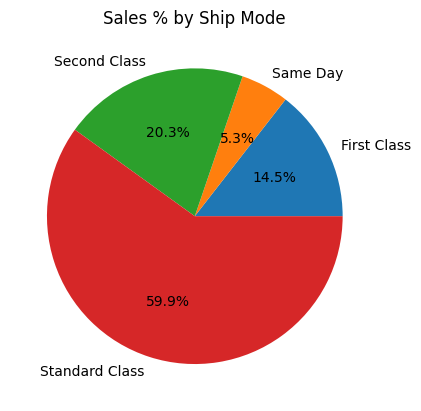

In [8]:
plt.pie(df_ship_mode_sales['Sales'], labels= df_ship_mode_sales['Ship Mode'], autopct='%.1f%%')
plt.title("Sales % by Ship Mode")
plt.show()

### Data in our dataframe are of mainly two categories
- Categorical Variables
- Numerical variables

Good Practice for visualisation

- Label Everything: All plots must have a clear title, properly labeled axes, and a legend if multiple groups or variables are present.

- Keep Scales Consistent: Use the same scale when comparing distributions or categories side-by-side to avoid misleading the viewer.

- Color Strategically: Use color to represent categories or to highlight important data points, but avoid using too many colors (generally no more than 6–8 distinct colors).

Order Matters: For categorical variables, often sorting the bars by count or value (descending or ascending) makes the chart much easier to read and interpret (a Pareto chart is an example of this).

In [9]:
df['Segment'].value_counts()

Segment
Consumer       26518
Corporate      15429
Home Office     9343
Name: count, dtype: int64

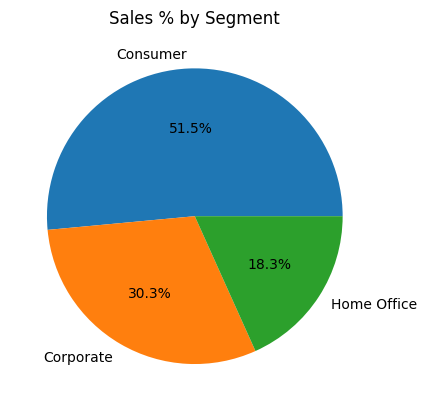

In [10]:
df_segment_sales = df.groupby(df['Segment']).agg({'Sales' : 'sum'})
df_segment_sales.reset_index(inplace =True) # Dataset indexing happens here

plt.pie(df_segment_sales['Sales'], labels= df_segment_sales['Segment'], autopct='%.1f%%')
plt.title("Sales % by Segment")
plt.show()

In [11]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [12]:
df['Category'].value_counts()

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

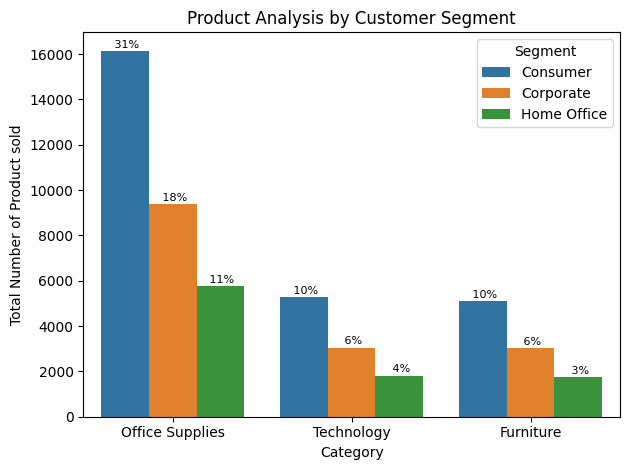

In [13]:
## Seaborn to visualize- Column Chart

plt.Figure(figsize=(20,9))
plt.title('Product Analysis by Customer Segment')
sns.countplot(x='Category', data=df, hue='Segment', order=df['Category'].value_counts().index)

total_order = len(df)

ax = plt.gca()
ax.set_ylabel("Total Number of Product sold")

for container in ax.containers:
    for bar in container.patches:
        height = bar.get_height() # the count value of the bar
        percentage = (height/total_order) *100

        ax.text(
            bar.get_x() + bar.get_width()/ 2, # X position
            height + 50, # Slightly above the bar
            f'{percentage: .0f}%',
            ha = 'center',
            va = 'bottom',
            fontsize =8
        )


plt.tight_layout()
plt.show()

## Inference from this visuals-

- Office Supplies has majoruty of sales , in Office supply Consumer has the most sales.
- Simmilar trend in other product category

## Homework- profit

In [14]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

In [15]:
df_sub_category_sales = df.groupby(df['Sub-Category']).agg({'Sales' : 'sum'}).sort_values(by='Sales', ascending=False)
df_sub_category_sales.reset_index(inplace =True) # Dataset indexing happens here

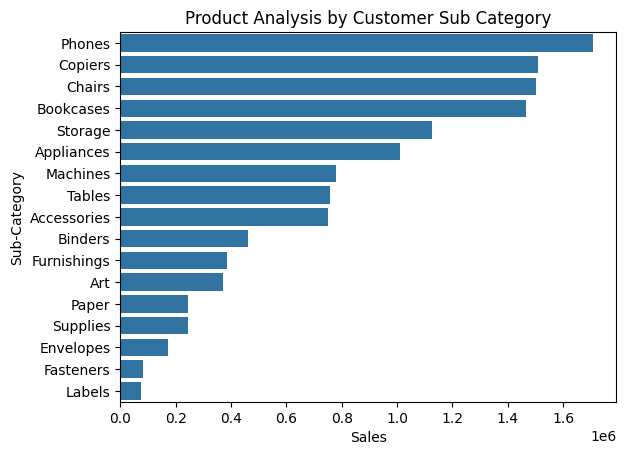

In [16]:
plt.Figure(figsize=(40,10))
plt.title('Product Analysis by Customer Sub Category')
sns.barplot(x='Sales', y = 'Sub-Category',data=df_sub_category_sales)
plt.show()

In [17]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

###
- Create visulaisation for - City, Country , market, Region
- Try tp create more groupby and create - Visuals 

In [18]:
df_sub_group = df.groupby(['City','State', 'Country','Market', 'Region']).agg(
    Total_Sales = ('Sales' , 'sum'),
    Mean_Profit = ('Profit', 'mean'),
    Order_count = ('Order ID', 'count')
).reset_index()


df_sub_group    

,City,State,Country,Market,Region,Total_Sales,Mean_Profit,Order_count
0,Aachen,North Rhine-Westphalia,Germany,EU,Central,3803.151,65.704765,17
1,Aalen,Baden-Württemberg,Germany,EU,Central,979.695,283.005000,1
2,Aalst,East Flanders,Belgium,EU,Central,387.330,38.077500,4
3,Aba,Abia,Nigeria,Africa,Africa,1064.124,-59.022240,25
4,Abadan,Khuzestan,Iran,EMEA,EMEA,1354.950,21.256364,11
...,...,...,...,...,...,...,...,...
3814,Zwedru,Grand Gedeh,Liberia,Africa,Africa,49.410,11.850000,1
3815,Zwickau,Saxony,Germany,EU,Central,99.030,6.460000,3
3816,Zwolle,Overijssel,Netherlands,EU,Central,150.585,-27.547500,2
3817,eMbalenhle,Mpumalanga,South Africa,Africa,Africa,75.900,6.810000,2


In [19]:
df_sub_group['Region'].value_counts()

Region
Central           879
South             786
EMEA              450
North Asia        332
North             323
Africa            316
Central Asia      183
West              170
East              114
Oceania            93
Southeast Asia     83
Canada             46
Caribbean          44
Name: count, dtype: int64

In [20]:
df['Ship Date']

0        31-07-2012
1        07-02-2013
2        18-10-2013
3        30-01-2013
4        06-11-2013
            ...    
51285    19-06-2014
51286    24-06-2014
51287    02-12-2013
51288    22-02-2012
51289    26-05-2012
Name: Ship Date, Length: 51290, dtype: object

##### Always convert date from Object to datetime

In [21]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])



In [22]:
# Feature Engineering

df['order_year'] = df['Order Date'].dt.year


In [23]:
df['order_year'].value_counts()

order_year
2014    17531
2013    13799
2012    10962
2011     8998
Name: count, dtype: int64

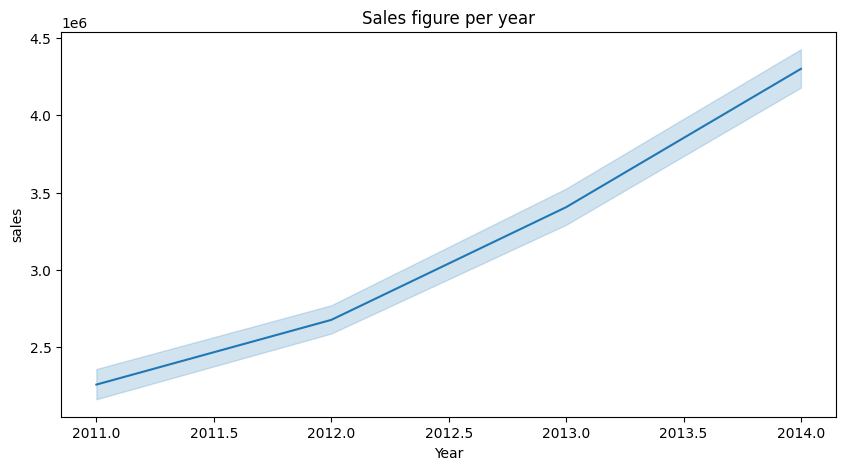

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df['order_year'], y=df['Sales'],estimator='sum')
plt.title("Sales figure per year")
plt.xlabel("Year")
plt.ylabel("sales")
plt.show()

#### Questions to our data 
- What is the growth rate of per year ?
- Which product is showing the highest potential interm of Growth/Sales
- Which region is showing high sales/profit
- Whihch Market/Country has the highest sales/profit
- Which Month Higest sales/profit
- Which segment highest sales ?
- Top 10 customers accross segments are giving the orders ?
- Which country /region highest sales of different sub categories ?
- Which countries has most customers ?
- How much supply should there be to cover our demands ? **Hard question** 
 1. What is our demand ?
 2. Predict the qty ?
- What is the shipping cost over the year accorss different countries/markets ?
***How maximise your profit, - Procure at less price/competititve price, minimize your shipping cost, getting our good according to priority***

In [25]:
df_growth_rate = df.groupby(['order_year']).agg(Total_Sales = ('Sales' , 'sum')).reset_index()
df_growth_rate

,order_year,Total_Sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


In [26]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'order_year'],
      dtype='object')

###  Learnings 
- How to change data type - Object to datetime
- Groupby 
- Aggregation
- Pie chart - max 4 categirues
- Bar chart - Horizontal - Many categiries
- Column chart - Many categories but it should be lesser than barchart categories


### Which Region shows highest Sales & Profit?

In [27]:
# Which Region shows highest Sales & Profit?

region_df = df.groupby('Region').agg(
    total_sales = ('Sales','sum'),
    total_profit=('Profit','sum')
).sort_values('total_sales', ascending= False)


In [28]:
region_df

,total_sales,total_profit
Region,,
Central,2.822303e+06,311403.98164
South,1.600907e+06,140355.76618
North,1.248166e+06,194597.95252
Oceania,1.100185e+06,120089.11200
Southeast Asia,8.844232e+05,17852.32900
North Asia,8.483098e+05,165578.42100
EMEA,8.061613e+05,43897.97100
Africa,7.837732e+05,88871.63100
Central Asia,7.528266e+05,132480.18700


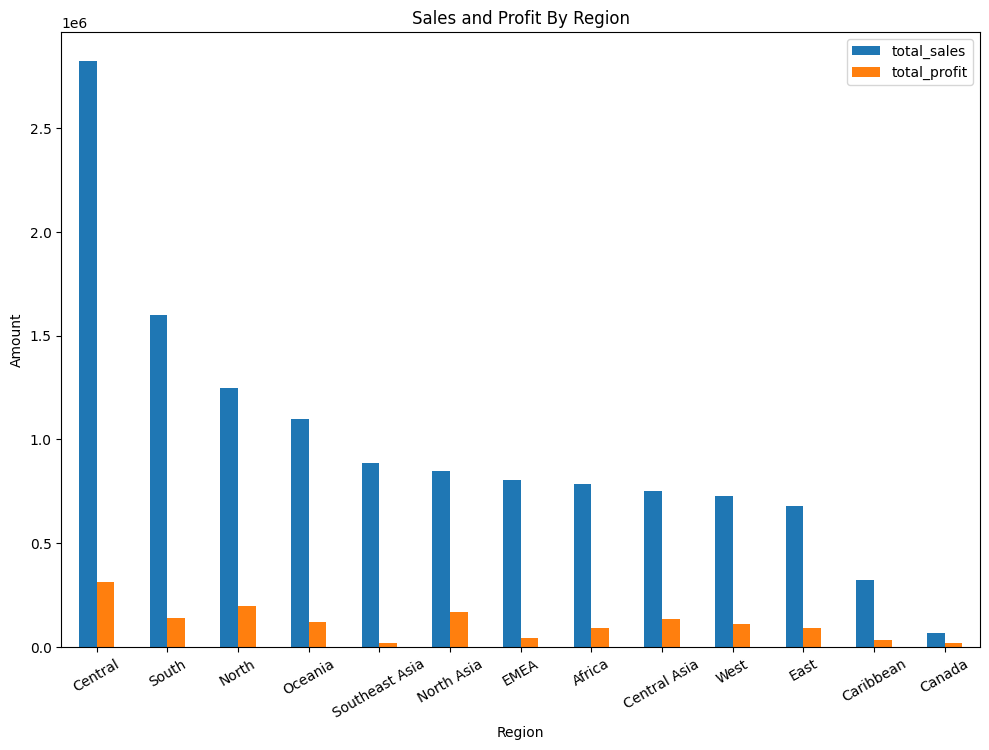

In [29]:
region_df.plot(kind='bar', figsize=(10,8), title='Sales and Profit By Region')
plt.ylabel('Amount'); plt.tight_layout() ; plt.xticks(rotation= 30); plt.show()

#### Whihch Market/Country has the highest sales/profit

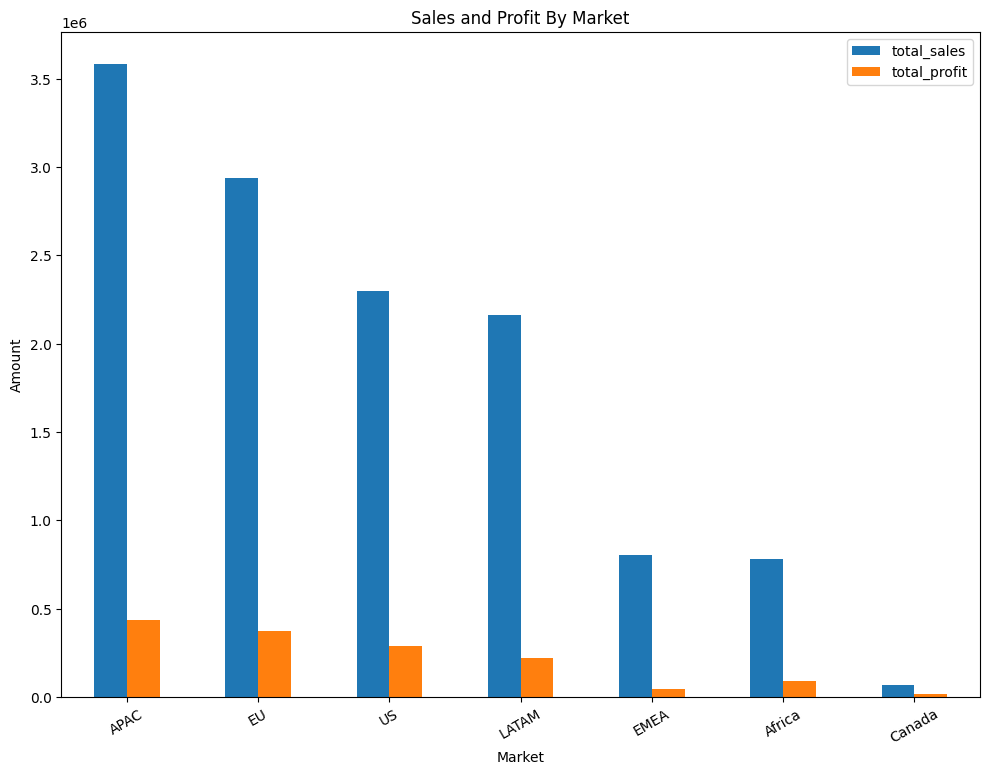

In [30]:
# Which Region shows highest Sales & Profit?

market_df = df.groupby('Market').agg(
    total_sales = ('Sales','sum'),
    total_profit=('Profit','sum')
).sort_values('total_sales', ascending= False)


market_df.plot(kind='bar', figsize=(10,8), title='Sales and Profit By Market')
plt.ylabel('Amount'); plt.tight_layout() ; plt.xticks(rotation= 30); plt.show()

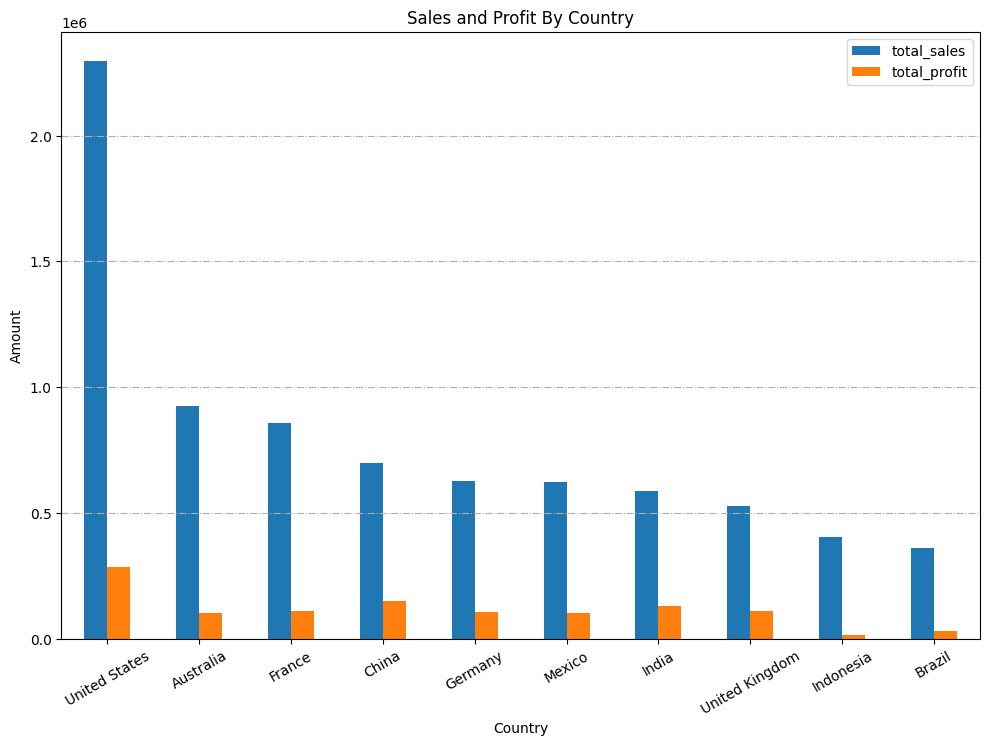

In [31]:
# Which Region shows highest Sales & Profit?

country_df = df.groupby('Country').agg(
    total_sales = ('Sales','sum'),
    total_profit=('Profit','sum')
).sort_values('total_sales', ascending= False)


country_df.head(10).plot(kind='bar', figsize=(10,8), title='Sales and Profit By Country')
plt.ylabel('Amount'); plt.tight_layout() ; plt.xticks(rotation= 30); plt.grid(axis='y', linestyle = '-.') ; plt.show()

In [32]:
df['Month'] = df['Order Date'].dt.month

In [33]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,order_year,Month
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,2014,6
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,2014,6
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,2013,12
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,2012,2


In [34]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'order_year', 'Month'],
      dtype='object')

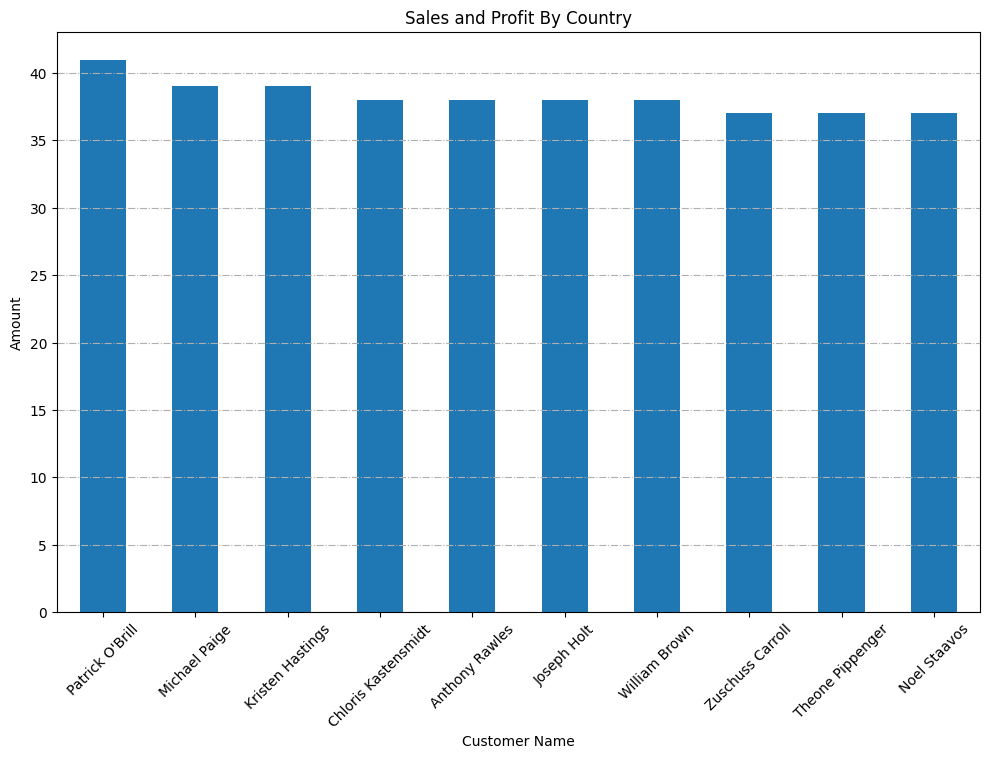

In [35]:
### Top 10 customers accross segments are giving the orders ?

top_customers = df.groupby(['Customer ID', 'Customer Name', 'Segment']).agg(
    order_count = ('Order ID', 'nunique'),
    total_sales = ('Sales','sum')
).sort_values('order_count', ascending= False).head(10)

# top_customers = top_customers.reset_index()

top_customers['order_count'].droplevel(['Segment','Customer ID']).plot(kind='bar', figsize=(10,8), title='Sales and Profit By Country')
plt.ylabel('Amount'); plt.tight_layout() ; plt.xticks(rotation=45); plt.grid(axis='y', linestyle = '-.') ; plt.show()

In [36]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,order_year,Month
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208,7.522636
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000,1.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000,5.000000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000,8.000000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000,10.000000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000,12.000000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931,3.300056


In [37]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'order_year', 'Month'],
      dtype='object')

- Mean = Average of the Data
- Median = Midlle point of Data
- Mode = Most Repeatitive value 
- Standard Deviation =  It is the measure which tells us how much the numbers in a data is spreadout from mean. If the std is way bigger then mean it means that data points are spread out from each other.

In [38]:
num_cols = ['Sales', 'Quantity', 'Discount','Profit', 'Shipping Cost']

df[num_cols]

,Sales,Quantity,Discount,Profit,Shipping Cost
0,2309.650,7,0.0,762.1845,933.57
1,3709.395,9,0.1,-288.7650,923.63
2,5175.171,9,0.1,919.9710,915.49
3,2892.510,5,0.1,-96.5400,910.16
4,2832.960,8,0.0,311.5200,903.04
...,...,...,...,...,...
51285,65.100,5,0.0,4.5000,0.01
51286,0.444,1,0.8,-1.1100,0.01
51287,22.920,3,0.0,11.2308,0.01
51288,13.440,2,0.0,2.4000,0.00


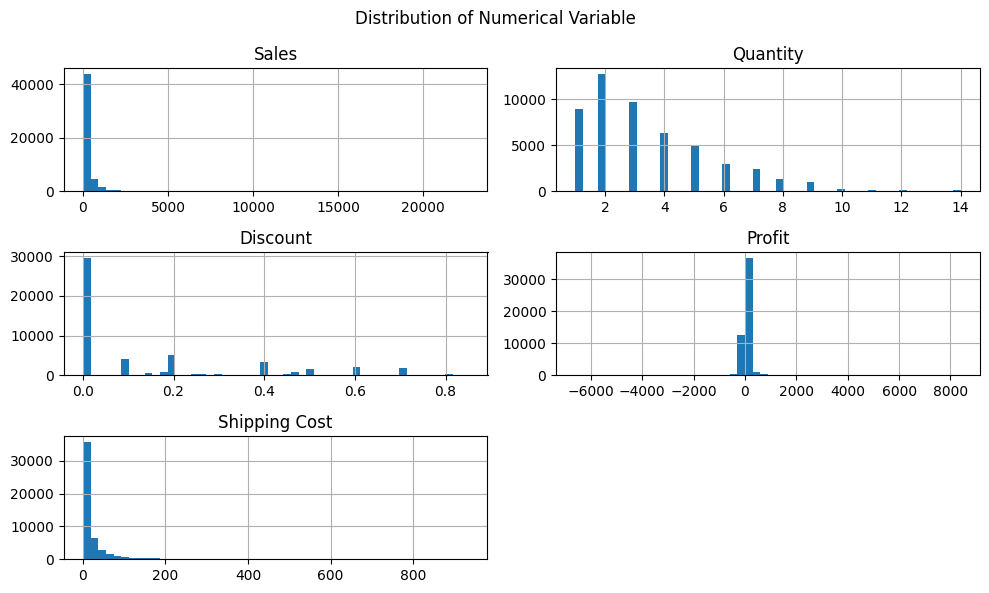

In [39]:
df[num_cols].hist(bins= 50, figsize=(10,6))
plt.suptitle("Distribution of Numerical Variable")
plt.tight_layout()
plt.show()

Type of Distribution 

- Left Skew Data/ Negative Skew  = The tail end will be on Left . In this distribution . Mode > Meadian > Mean
- Right Skew /Postive Skew =  The tail end will be on right . In this distribution . Mean > Meadian > Mode
- Normal Distribution = This is the ideal distribution where mean , median mode will be converging on the same peak

### Outlier Detection

- We use boxplots to detect the outliers 
- We have to calculate IQR = Inter Quartile Range. 
- IQR = Q3 - Q1 . 
- Lower Fence =  Q1 - (1.5 * IQR) - Q1 = 25%
- Upper Fence = Q3 + (1.5 *IQR) - Q3 = 75%

- Data points below the lower fence will be called Outlier , data points above the Upper fence will be called Outliers 

In [40]:
df[num_cols].describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


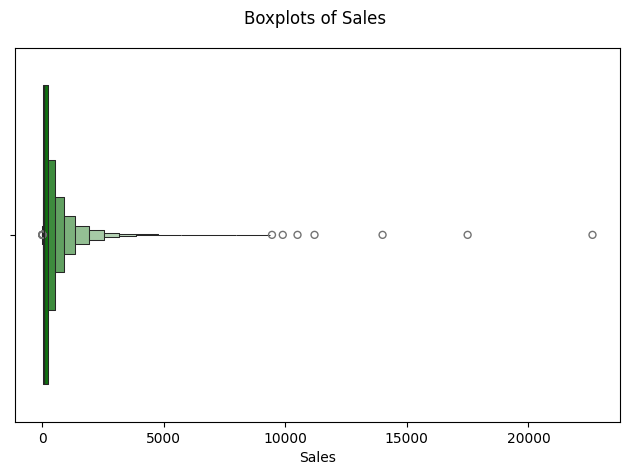

In [41]:
## Boxplots for Numerical values 

plt.Figure(figsize=(10,6))
sns.boxenplot(x=df['Sales'], color='green')
plt.suptitle("Boxplots of Sales")
plt.tight_layout()
plt.show()

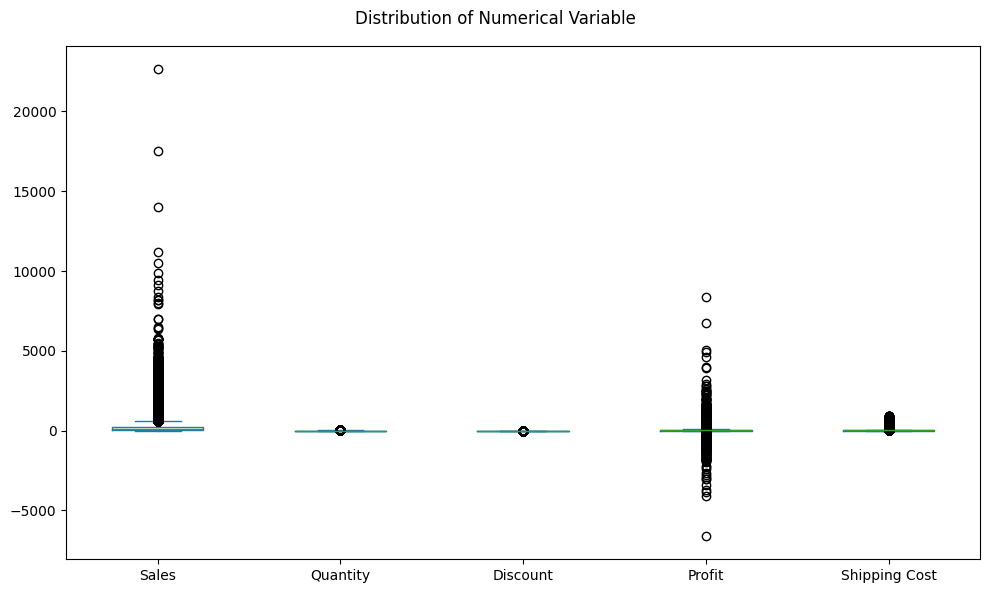

In [42]:
df[num_cols].plot(kind='box', figsize=(10,6))
plt.suptitle("Distribution of Numerical Variable")
plt.tight_layout()
plt.show()

#### Category vs Profit Analysis

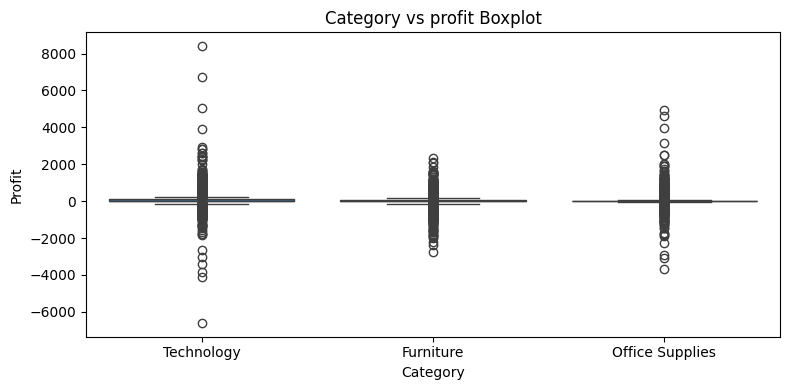

In [43]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Category vs profit Boxplot')
plt.tight_layout()
plt.show()

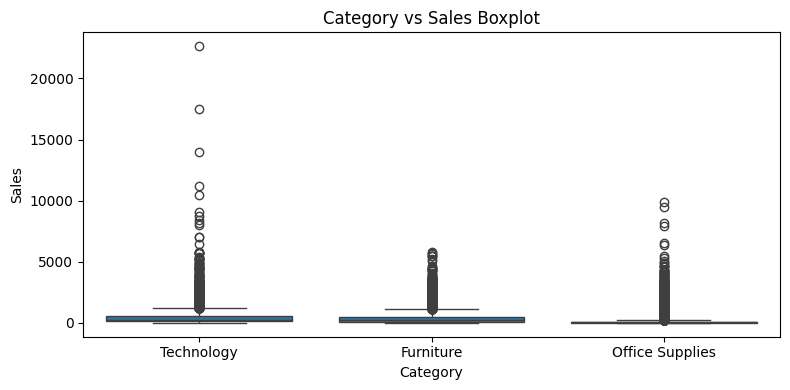

In [44]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Category vs Sales Boxplot')
plt.tight_layout()
plt.show()

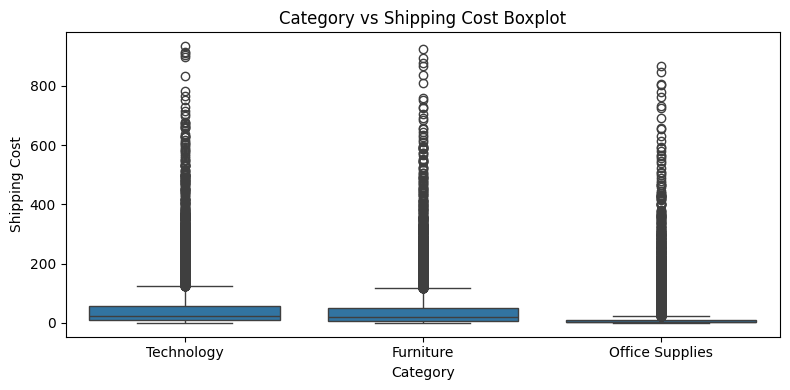

In [45]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Category', y='Shipping Cost', data=df)
plt.title('Category vs Shipping Cost Boxplot')
plt.tight_layout()
plt.show()

In [46]:
monthly_numeric = df.set_index('Order Date').resample('M')[num_cols].sum()

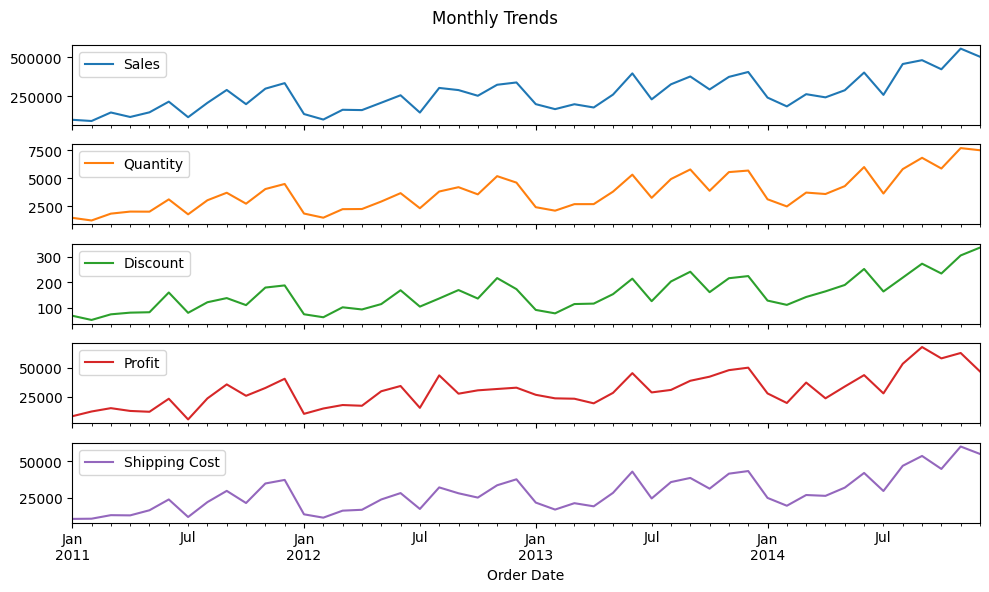

In [47]:
monthly_numeric.plot(subplots=True, figsize=(10,6), title="Monthly Trends")
plt.tight_layout()
plt.show()

#### Correlation Heat map - Here you will know the relationship between the numerical datapoints

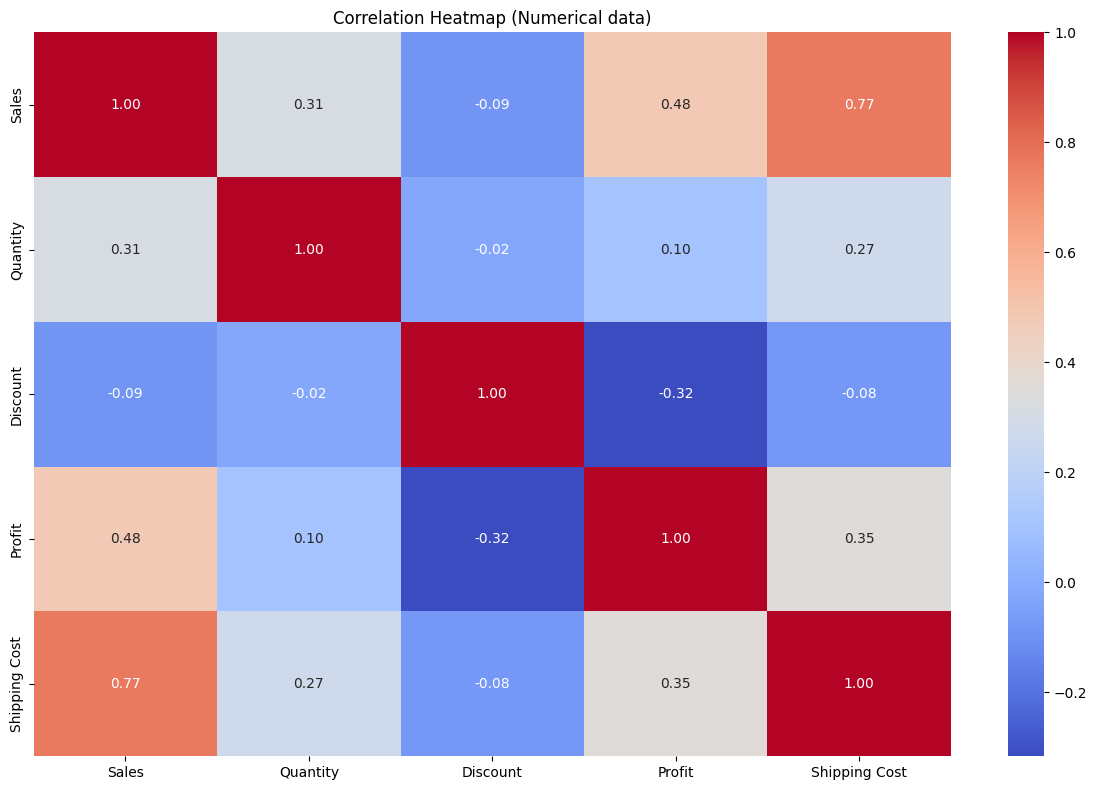

In [48]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical data)')
plt.tight_layout()
plt.show()

#### Interpretation from the Above Correltion Heatmap.

- Sales is highly related with Shipping Cost . More the sales more the Shipping cost .
- Proft is inversly prportional to Discount . If the Discount is more Profit will be less

### Pairplot

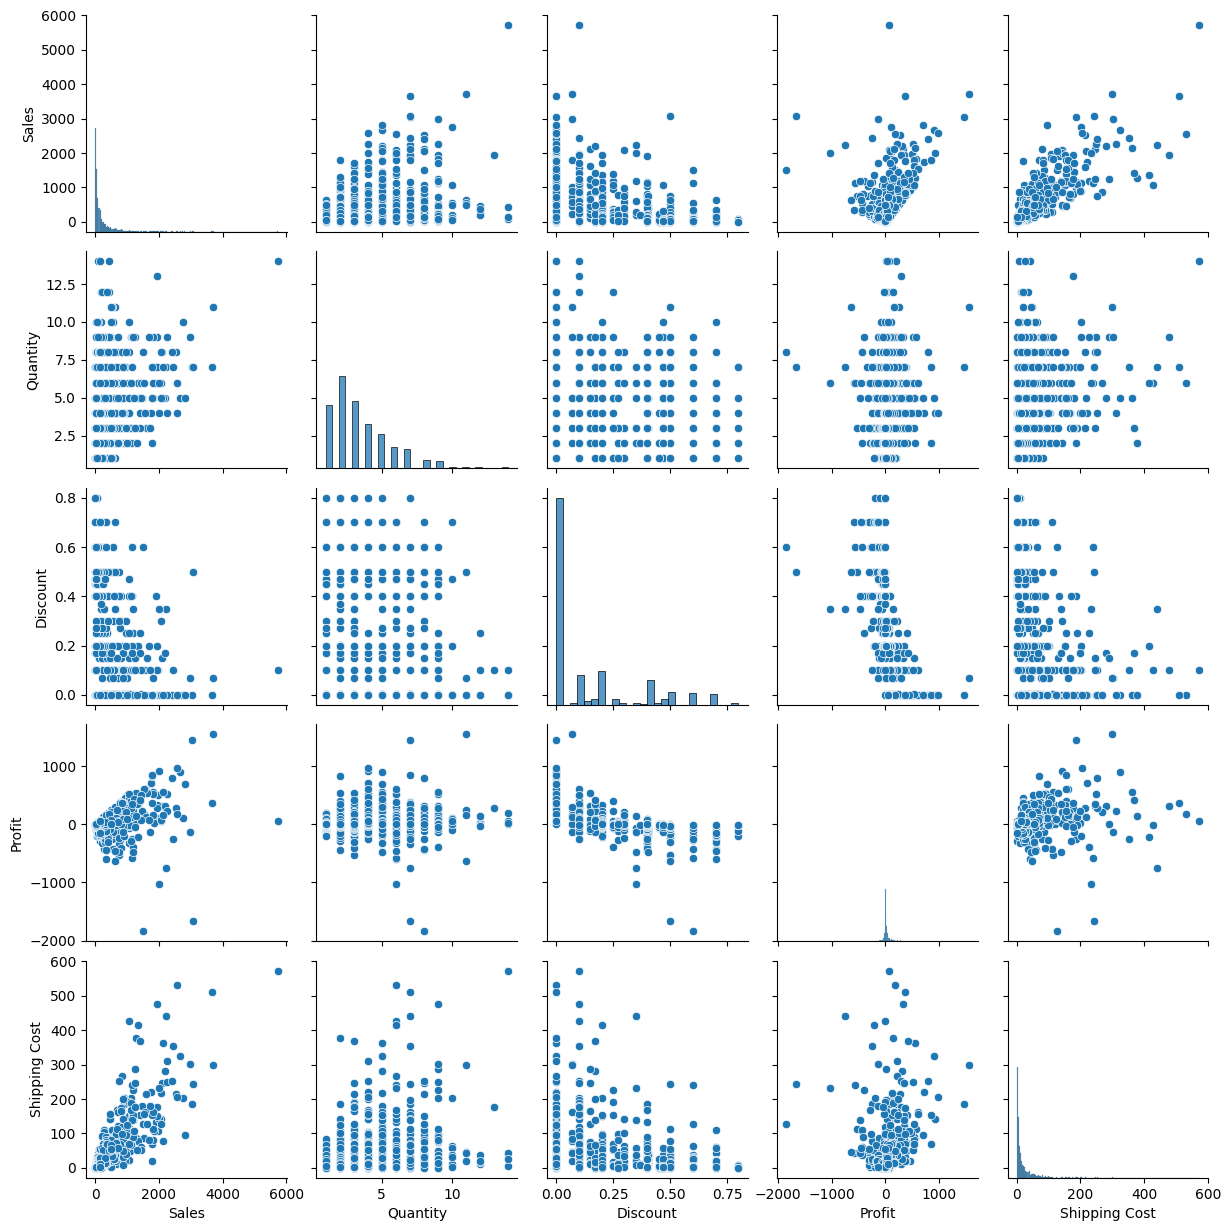

In [49]:
sample_df = df[num_cols].sample(2000, random_state=42)

sns.pairplot(sample_df)
plt.show()

### Scatter plot Relationship between numbers

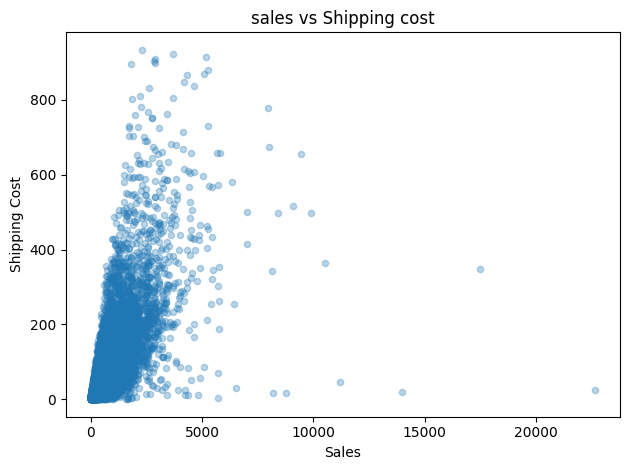

In [50]:
df.plot.scatter(x='Sales', y = 'Shipping Cost', alpha = 0.3 , title = 'sales vs Shipping cost')
plt.tight_layout()
plt.show()

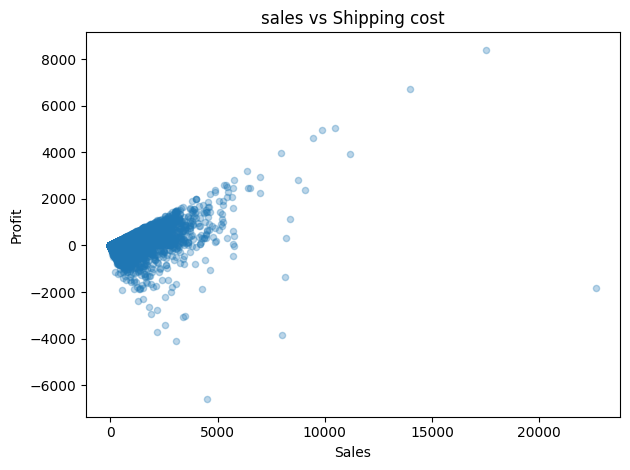

In [51]:
df.plot.scatter(x='Sales', y = 'Profit', alpha = 0.3 , title = 'sales vs Shipping cost')
plt.tight_layout()
plt.show()

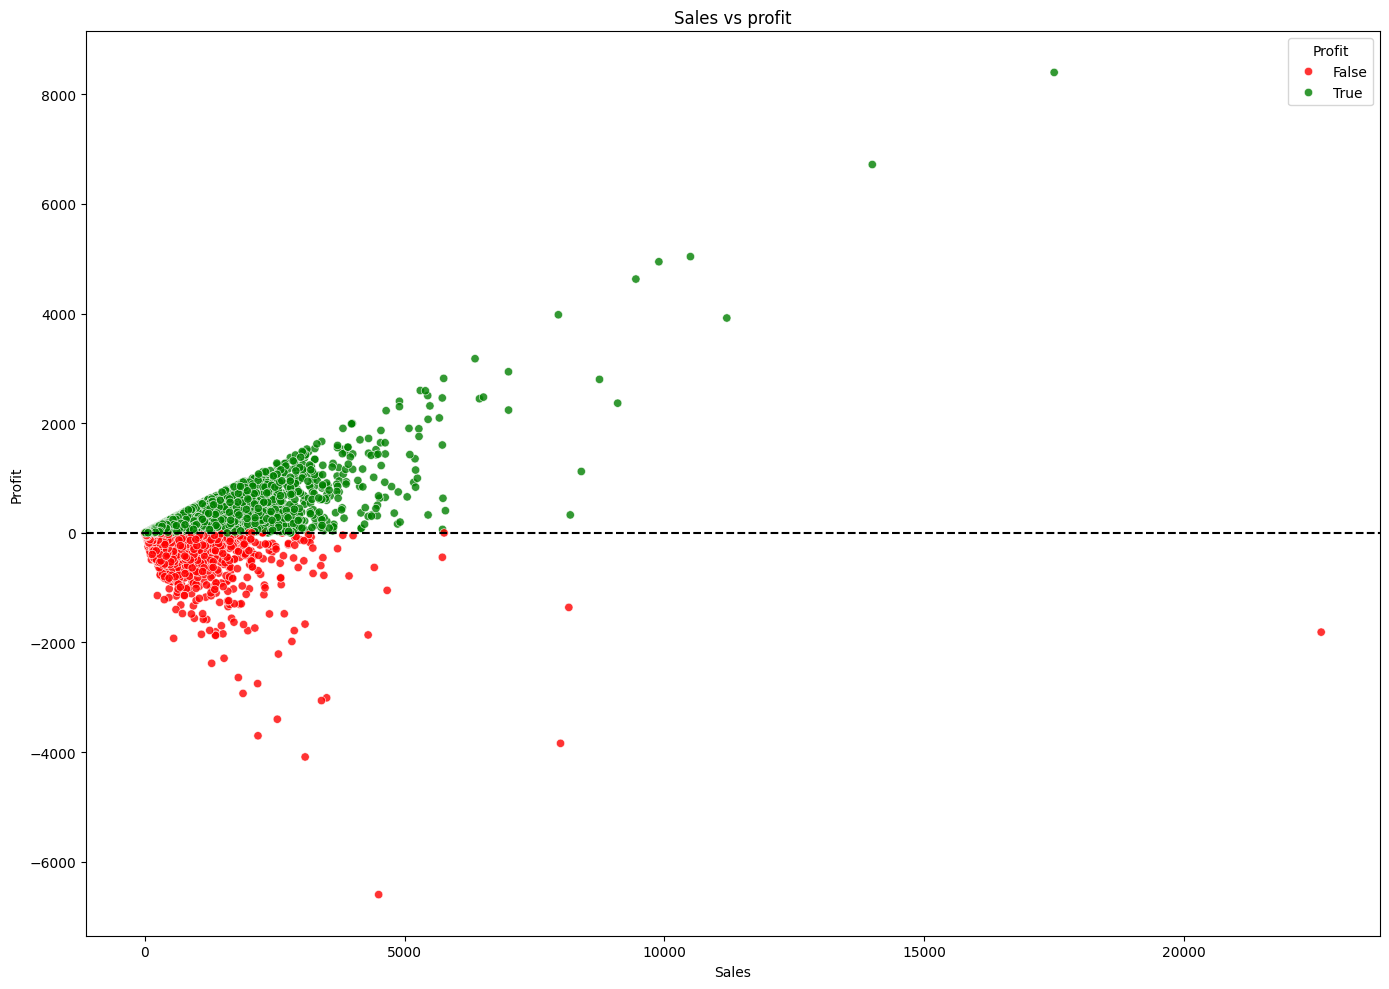

In [52]:
# Conditional formatting

plt.figure(figsize=(14,10))
sns.scatterplot(
    data=df,
    x= 'Sales',
    y = 'Profit',
    hue= df['Profit'] >= 0,
    palette={True : 'green', False : 'red'},
    alpha = 0.8
)
plt.axhline(0, linestyle = '--', color = 'black')
plt.title('Sales vs profit')
plt.tight_layout()
plt.show()

## Violin Plot
- Shows data density
- Better understanding of Spread

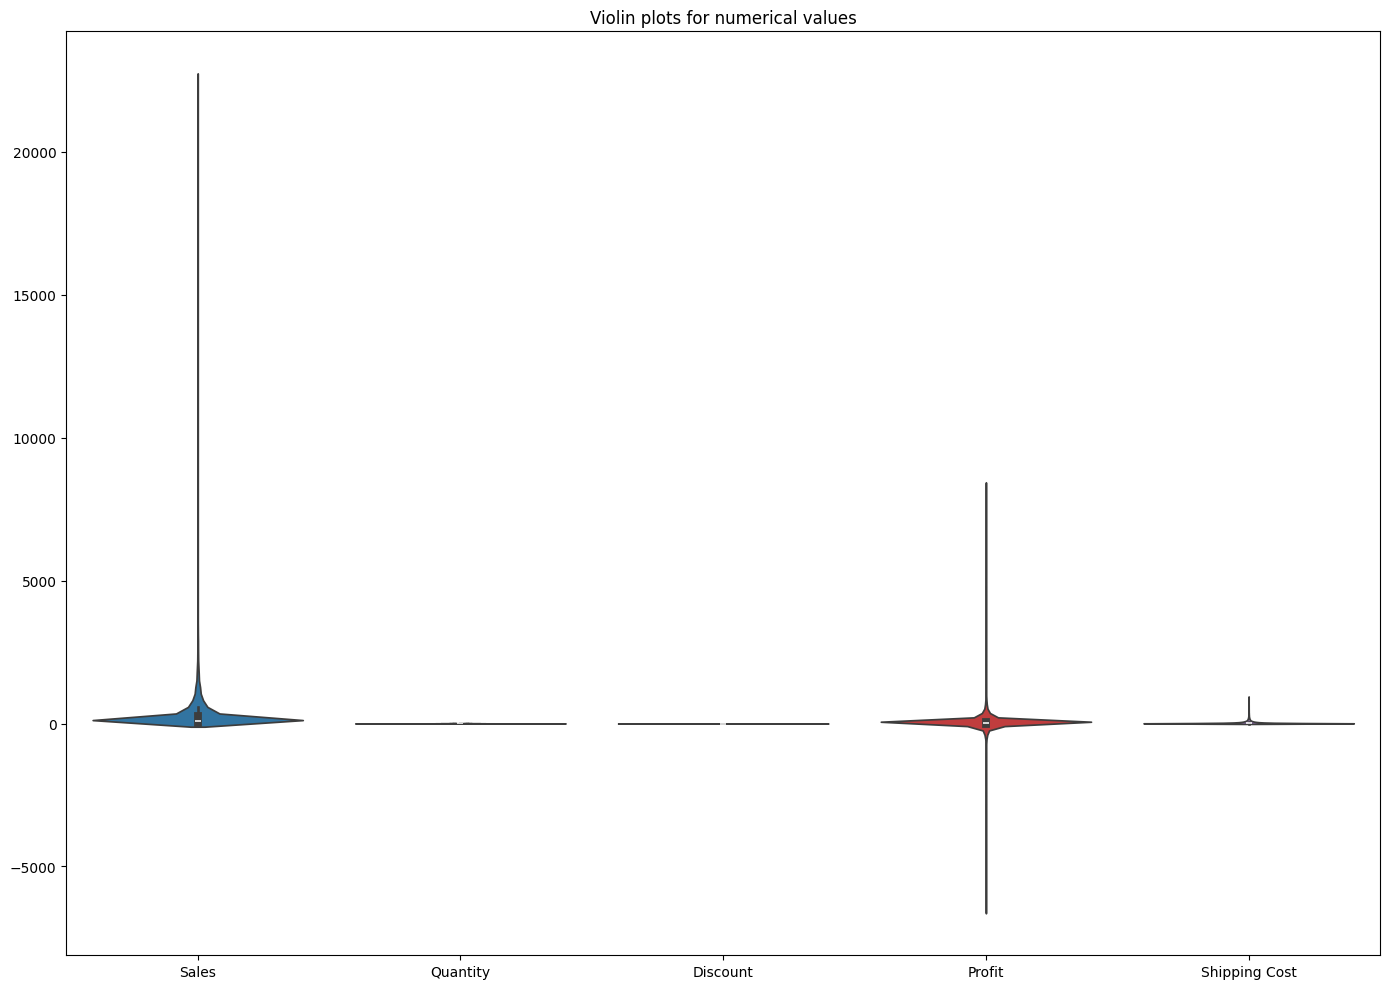

In [53]:
plt.figure(figsize=(14,10))
sns.violinplot(data=df[num_cols])
plt.title('Violin plots for numerical values')
plt.tight_layout()
plt.show()

### Feature Engineering

- What is feature engineering ?
- This is a technique where you will create additional columns in order to make your model good for training purpose. 
- In this process we are going to transform raw data into meaningfull , machine readable inputs (Independent variables).
- The whole purpose of Feature Engineering is to enhance ML model

In [54]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'order_year', 'Month'],
      dtype='object')

In [55]:
# Profit margin- It will tell you the product categories
df['Profit Margin'] = df['Profit'] / df['Sales']


In [56]:
# Discount Buckets - It will create groups 

def discount_bucket(x) :
    if x == 0:
        return "No Discount"
    elif 0 < x <= 0.1 :
        return "Low"
    elif 0.1 < x <=0.3 :
        return "Medium"
    else :
        return "High"
    
df["Discount_bucket"] = df['Discount'].apply(discount_bucket)

In [57]:
# High and low profit values - Important in classification

df['Profit lable'] = df['Profit'].apply(lambda x : "High Profit" if x > 0 else "Low Profit")

In [58]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'order_year', 'Month',
       'Profit Margin', 'Discount_bucket', 'Profit lable'],
      dtype='object')

In [59]:
# Shipping delays are common in Logistical Analytics

df['Shipping delay'] = (df['Ship Date'] - df['Order Date']).dt.days

In [60]:
df['Shipping delay'].value_counts()

Shipping delay
4    14434
5    11221
2     7026
6     6255
3     5035
7     3057
0     2600
1     1662
Name: count, dtype: int64

## HM - Create correlation map with the newly created numerical columns - tell the relationship

#### Statistical Analysis

### Hypothesis Testing

- It is ststistical testing /method which evaluates the validity of a claim abput a population parameters by analyzing the sample data
- H0 - Null Hypothesis, H1 - Alternate Hypothesis
- ANNOVA = An ANOVA (Analysis of Variance) test is a statistical method to determine if there are significant differences between the means of three or more groups, by comparing the variability between groups to the variability within groups, using an F-statistic. It tests the null hypothesis that all group means are equal, and a significant result (low p-value) suggests at least one group mean is different, requiring further post-hoc tests to identify which specific groups differ. 

- F statistics = It is the ratio between to varience . 

1.     Small Ratio (< 1): If the F-statistic is close to 1, the "between-group" variance is about the same as the "within-group" (error) variance. This suggests any differences are likely just random noise.

2.      Big Ratio (> 1): As the F-statistic grows, it means the difference between the group means is much larger than the "spread" of the data inside those groups




- Higher value meaning - Null Hypothesis will reject . 
- P value = if it is less then 0.05 we will reject the null hypothesis

In [61]:
df['Discount_bucket'].value_counts()

Discount_bucket
No Discount    29009
High           10361
Medium          7241
Low             4679
Name: count, dtype: int64

In [62]:
# Test -1 
# Does Discount Significantly affect Profit ? 
# H0 - No Mean is same accross discount levels 
# H1 Mean Prfit is different 
# We are here going to use - ANNOVA Testing 

from scipy.stats import f_oneway

# We will create groups to test

no_discount = df[df['Discount_bucket']== "No Discount"]["Profit"]
low = df[df['Discount_bucket']== "Low"]["Profit"]
medium = df[df['Discount_bucket']== "Medium"]["Profit"]
high = df[df['Discount_bucket']== "High"]["Profit"]

In [63]:
# ANNOVA Test

annova_result = f_oneway(no_discount, low, medium, high)
annova_result

F_onewayResult(statistic=np.float64(1880.7932550383548), pvalue=np.float64(0.0))

### Interpretation of ANNOVA Test

- If P value <0.05 = Discount level significantly affects profit
- if p value >0.05 = No Significant effect 

That means discount significantly effects profit 

In [64]:
# is Sales different across region ?
# HO - Mean of sales of each region is same
# H1 At least one region is different the mean

regions = df['Region'].unique()

sales_groups = [df[df['Region']==region]['Sales'] for region in regions]

annova_region = f_oneway(*sales_groups)
annova_region


F_onewayResult(statistic=np.float64(55.48438366881459), pvalue=np.float64(7.28547664877952e-134))

### Inference from the above test

- F satistics - ration is 55.48 the value is very high - It means we reject the Null Hypothesis
- p value - 7.28 * e-134 ~ 0 - It means we reject the null hypothesis

#### Conclusion - At least one region is different from other regions , Mean is not same in different regions 

### Chi Square Test


In [65]:
# Test 3 
# Is category related to high and low profit ?
# H0 No it is not related
# H1 it is related

from scipy.stats import chi2_contingency

contengency = pd.crosstab(df['Category'], df['Profit lable'])


chi2, p, dof, expected = chi2_contingency(contengency)

print(f"Chi2 value is: ", chi2)
print(f"p value is: ", p)



Chi2 value is:  314.073917947962
p value is:  6.305438043686884e-69


- Chi2 - Total distance between my observed data . My value is 314 it is a very large value . That means there are dependency between my data points.
- P value - p value here is 6.305* e _69 ~ 0 . That means we reject null hypothesis
- dof - Degrees of freedom - it represants the number of values in the calculation are free to vary - 2 . at value 2 the curve is at its highest peak
- expected - Expected frequiencies its a caluculated numpy array for comparison.


### Conclusion 

- chi2 and p value determines that we reject null hypothesis and our alternate hypothesis says that category is highly dependent on Profit lables

#### Corelation Significance

- pearson correlation + p-value : 

- The Pearson Correlation Coefficient (r) is a measure of the strength and direction of a linear relationship between two continuous variables.

In [66]:
from scipy.stats import pearsonr

corr, p_value  = pearsonr(df['Sales'], df['Profit'])

print(f"Correlation value is: ", corr)
print(f"p value is: ", p_value)

Correlation value is:  0.4849181126194445
p value is:  0.0


- Correlation value is 0.48
- If corr value is closae to 1 - Strong correlation
- if corr value is close to 0 - weak relationship
- if p value <0.05 we say that relationship is statistically significant

### Conclusion

High sales is satistically significant for Profit. 

### Preparing the data for machine learning model

In [67]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


### Encoding

- It is the process to convert data for ML model to learn from it.
- We convert categorical data into numerical values. So that Algorithm can understand the datapoints
- Our dataset basically is of two type of variables.
- Indipendent varibles - X and Dependent variables - Y
- Dependent variable is what we are going to predict, with the help of indipendent variable
- We have to split the dataset into X and Y to feed that into our ML model- Machine Learning Model
- We can encode beofore the splitting or after the splitting of the dataset . 
- Which is the better way ? Will discuss at the end

In [ ]:
y = df["Profit"] # Dependent Column

X = df.drop(columns=[
    "Profit",
    "Order ID",
    "Customer ID",
    "Customer Name",
    "Product Name",
    "Order Date",
    "Ship Date",
    'Product ID',
    'Row ID'
]) # Indioendent column


In [95]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split our dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

- Train Data - Is where we train our model
- test data - Is where we test our model for prediction

In [97]:
X['Ship Mode'].value_counts()

Ship Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Mode        51290 non-null  object 
 1   Segment          51290 non-null  object 
 2   City             51290 non-null  object 
 3   State            51290 non-null  object 
 4   Country          51290 non-null  object 
 5   Postal Code      9994 non-null   float64
 6   Market           51290 non-null  object 
 7   Region           51290 non-null  object 
 8   Category         51290 non-null  object 
 9   Sub-Category     51290 non-null  object 
 10  Sales            51290 non-null  float64
 11  Quantity         51290 non-null  int64  
 12  Discount         51290 non-null  float64
 13  Shipping Cost    51290 non-null  float64
 14  Order Priority   51290 non-null  object 
 15  order_year       51290 non-null  int32  
 16  Month            51290 non-null  int32  
 17  Profit Margi

### Data Type - 

- Nominal Data - It is a datatype which has no order
- Ordinal data - Data type that has order

In [ ]:
# We define Numerical columns, Ordinal columns, Nominal columns 

ordinal_columns = [
    'Order Priority',
    'Discount_bucket'
]

nominal_columns = [
    'Ship Mode', 'Segment', 'City', 'State', 'Country',
    'Market', 'Region', 'Category', 'Sub-Category',
    'Profit lable'
]

num_cols = X.select_dtypes(include=['int32','int64','float64'])

In [ ]:
# We define the Ordering of Ordinal columns

order_priority = ["Low", "Medium", "High", "Critical"]
discount_order = ["No Discount", "Low", "Medium", "High"]

#### Encoding Techniques 
- For Nominal - Onehot encoder
- For Ordinal - Ordinalencoder
- For Target - We use Label Encoder

In [106]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
# Here we are defining our Encoders

ordinal_encoder = OrdinalEncoder(categories=[order_priority, discount_order])
one_hot_encoder = OneHotEncoder(handle_unknown="ignore",
                                sparse_output=False)


Scaling Tecjniques - It is a process where we use this technique to normalize our numerical data to a fixed , range so that our model dop not provide bad prediction. The idea is to put very low number and very high number in a particular numerical range

In [110]:
# ColumnTransformer to transform our data

preprocessor = ColumnTransformer(
    transformers=[
    ("num",Pipeline([('scaler',StandardScaler())]),num_cols ),
    ('ord', ordinal_encoder, ordinal_columns),
    ('nom', one_hot_encoder, nominal_columns)
    ])

In [111]:
preprocessor

,transformers,"[('num', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


### Our First machine Learning Model

In [80]:
X.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Postal Code',
       'Market', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Shipping Cost', 'Order Priority', 'order_year', 'Month',
       'Profit Margin', 'Discount_bucket', 'Profit lable', 'Shipping delay'],
      dtype='object')

In [81]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'order_year', 'Month',
       'Profit Margin', 'Discount_bucket', 'Profit lable', 'Shipping delay'],
      dtype='object')